In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector


Welcome to JupyROOT 6.28/00


In [2]:
eras = ["all", "2022", "2023"]

In [3]:
# path_2022_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2022X_muonMatched_goodlumi.root"
# path_2023_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2023X_muonMatched_goodlumi.root"
# path_2022_not_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2022X_notMuonMatched_oneProbe_goodlumi.root"
# path_2023_not_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2023X_notMuonMatched_oneProbe_goodlumi.root"

In [ ]:
path_2022 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_newMerge_withJets/TrigEff_Output_2022_081524.root"
path_2023 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_newMerge_withJets/TrigEff_Output_2023_081524.root"
#path_2022_not_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2022X_notMuonMatched_oneProbe_goodlumi.root"
#path_2023_not_muonMatched = "/eos/uscms/store/user/amalbert/MDSTriggerEff/TrigEff_Output_Timing_Study/TrigEff_Run2023X_notMuonMatched_oneProbe_goodlumi.root"

In [4]:
ak.behavior.update(candidate.behavior)

def getLZDF(f,nEvents=-1,version="new"): #lazy dataframe with events that have cluster matched to probe muon
    events_raw = uproot.open(f)['MuonSystem']
    df = coffea.processor.LazyDataFrame(events_raw,entrystop=nEvents)
    start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
    events = uproot.lazy(df._tree)
    events = events[start:stop]
    return events

In [5]:
events_2022_muonMatched = getLZDF(path_2022_muonMatched)
events_2023_muonMatched = getLZDF(path_2023_muonMatched)

events_2022_not_muonMatched = getLZDF(path_2022_not_muonMatched)
events_2023_not_muonMatched = getLZDF(path_2023_not_muonMatched)


events_2022_muonMatched = events_2022_muonMatched[events_2022_muonMatched["runNum"]>=360019]
events_all_muonMatched = ak.concatenate([events_2022_muonMatched, events_2023_muonMatched])
events_all_muonMatched_timecut = ak.mask(events_all_muonMatched, (ak.flatten(events_all_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_all_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_all_muonMatched_timecut = events_all_muonMatched_timecut[~ak.is_none(events_all_muonMatched_timecut)]
events_all_muonMatched_notimecut = ak.mask(events_all_muonMatched, (ak.flatten(events_all_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_all_muonMatched_notimecut = events_all_muonMatched_notimecut[~ak.is_none(events_all_muonMatched_notimecut)]

events_2022_not_muonMatched = events_2022_not_muonMatched[events_2022_not_muonMatched["runNum"]>=360019]
events_all_not_muonMatched = ak.concatenate([events_2022_not_muonMatched, events_2023_not_muonMatched])
events_all_notMuonMatched_timecut = ak.mask(events_all_not_muonMatched, ~(ak.flatten(events_all_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_all_not_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_all_notMuonMatched_timecut = events_all_notMuonMatched_timecut[~ak.is_none(events_all_notMuonMatched_timecut)]
events_all_notMuonMatched_notimecut = ak.mask(events_all_not_muonMatched, ~(ak.flatten(events_all_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_all_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_all_notMuonMatched_notimecut = events_all_notMuonMatched_notimecut[~ak.is_none(events_all_notMuonMatched_notimecut)]

In [6]:
events_2022_muonMatched_timecut = ak.mask(events_2022_muonMatched, (ak.flatten(events_2022_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2022_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_muonMatched_timecut = events_2022_muonMatched_timecut[~ak.is_none(events_2022_muonMatched_timecut)]
events_2022_muonMatched_notimecut = ak.mask(events_2022_muonMatched, (ak.flatten(events_2022_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_muonMatched_notimecut = events_2022_muonMatched_notimecut[~ak.is_none(events_2022_muonMatched_notimecut)]

events_2022_notMuonMatched_timecut = ak.mask(events_2022_not_muonMatched, ~(ak.flatten(events_2022_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2022_not_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_notMuonMatched_timecut = events_2022_notMuonMatched_timecut[~ak.is_none(events_2022_notMuonMatched_timecut)]
events_2022_notMuonMatched_notimecut = ak.mask(events_2022_not_muonMatched, ~(ak.flatten(events_2022_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2022_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2022_notMuonMatched_notimecut = events_2022_notMuonMatched_notimecut[~ak.is_none(events_2022_notMuonMatched_notimecut)]

In [7]:
events_2023_muonMatched_timecut = ak.mask(events_2023_muonMatched, (ak.flatten(events_2023_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2023_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_muonMatched_timecut = events_2023_muonMatched_timecut[~ak.is_none(events_2023_muonMatched_timecut)]
events_2023_muonMatched_notimecut = ak.mask(events_2023_muonMatched, (ak.flatten(events_2023_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_muonMatched_notimecut = events_2023_muonMatched_notimecut[~ak.is_none(events_2023_muonMatched_notimecut)]

events_2023_notMuonMatched_timecut = ak.mask(events_2023_not_muonMatched, ~(ak.flatten(events_2023_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2023_not_muonMatched.cscRechitCluster_PassTimeVeto))&(ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_notMuonMatched_timecut = events_2023_notMuonMatched_timecut[~ak.is_none(events_2023_notMuonMatched_timecut)]
events_2023_notMuonMatched_notimecut = ak.mask(events_2023_not_muonMatched, ~(ak.flatten(events_2023_not_muonMatched.cscRechitCluster_matchToProbeMuon))&(ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberPlus11)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberPlus12)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberMinus11)+ak.flatten(events_2023_not_muonMatched.cscRechitClusterNRechitChamberMinus12)==0))
events_2023_notMuonMatched_notimecut = events_2023_notMuonMatched_notimecut[~ak.is_none(events_2023_notMuonMatched_notimecut)]

In [8]:
chamber_locations = {
    "ME11": {"MinR": 100, "MaxR": 275, "minZ": 580, "maxZ": 632, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus11", "cscRechitClusterNRechitChamberPlus11"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME12": {"MinR": 275, "MaxR": 465, "minZ": 668, "maxZ": 725, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus12", "cscRechitClusterNRechitChamberPlus12"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME13": {"MinR": 505, "MaxR": 700, "minZ": 668, "maxZ": 724, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus13", "cscRechitClusterNRechitChamberPlus13"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 20), np.arange(200, 1000, 100)]))},
    "ME21": {"MinR": 139, "MaxR": 345, "minZ": 789, "maxZ": 850, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus21", "cscRechitClusterNRechitChamberPlus21"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME22": {"MinR": 357, "MaxR": 700, "minZ": 791, "maxZ": 850, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus22", "cscRechitClusterNRechitChamberPlus22"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))},
    "ME31": {"MinR": 160, "MaxR": 345, "minZ": 915, "maxZ": 970, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus31", "cscRechitClusterNRechitChamberPlus31"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME32": {"MinR": 357, "MaxR": 700, "minZ": 911, "maxZ": 970, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus32", "cscRechitClusterNRechitChamberPlus32"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))},
    "ME41": {"MinR": 178, "MaxR": 345, "minZ": 1002, "maxZ": 1063, "HLT_thresh": 500, "branch_names": ["cscRechitClusterNRechitChamberMinus41", "cscRechitClusterNRechitChamberPlus41"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))},
    "ME42": {"MinR": 357, "MaxR": 700, "minZ": 1002, "maxZ": 1063, "HLT_thresh": 200, "branch_names": ["cscRechitClusterNRechitChamberMinus42", "cscRechitClusterNRechitChamberPlus42"], "binning": hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))}
}

In [9]:
nRechits_branches = ["cscRechitClusterNRechitChamberMinus11", "cscRechitClusterNRechitChamberPlus11", "cscRechitClusterNRechitChamberMinus12", "cscRechitClusterNRechitChamberPlus12",
                    "cscRechitClusterNRechitChamberMinus13", "cscRechitClusterNRechitChamberPlus13", "cscRechitClusterNRechitChamberMinus21", "cscRechitClusterNRechitChamberPlus21",
                    "cscRechitClusterNRechitChamberMinus22", "cscRechitClusterNRechitChamberPlus22", "cscRechitClusterNRechitChamberMinus31", "cscRechitClusterNRechitChamberPlus31",
                    "cscRechitClusterNRechitChamberMinus32", "cscRechitClusterNRechitChamberPlus32", "cscRechitClusterNRechitChamberMinus41", "cscRechitClusterNRechitChamberPlus41",
                    "cscRechitClusterNRechitChamberMinus42", "cscRechitClusterNRechitChamberPlus42"]

In [10]:
#code to mask for clusters for which majority of events are in designated chamber
#require greater than 90% of hits to be in given chamber as well
def compute_chamber_mask(data, chamber, threshold, endcap=None):
    nRechits_byChamber = {}
    final_masks = []
    for x in range(2):
        correct_chamber_branch = chamber_locations[chamber]["branch_names"][x]
        incorrect_chamber_branches = []
        for chamber_branch in nRechits_branches:
            if chamber_branch != correct_chamber_branch:
                incorrect_chamber_branches.append(chamber_branch)         
        mask = ak.flatten(data[correct_chamber_branch])>ak.flatten(data[incorrect_chamber_branches[0]])
        for idx in range(1, len(incorrect_chamber_branches)):
            mask = np.logical_and(mask, ak.flatten(data[correct_chamber_branch])>ak.flatten(data[incorrect_chamber_branches[idx]]))
        mask = np.logical_and(mask, (ak.flatten(data[correct_chamber_branch])/ak.flatten(data["cscRechitClusterSize"])>=threshold))
        #code to mask out negative endcap clusters in problematic region
        #if x==0 and (chamber=="ME31" or chamber=="ME41"):
        #    mask = np.logical_and(mask, np.logical_not(noisy_cluster_events(data)))
        #print(ak.count_nonzero(mask))
        final_masks.append(mask)
    if endcap==None:
        return np.logical_or(final_masks[0], final_masks[1])
    else:
        return final_masks[endcap]

In [11]:
#function to to return ratio histograms
def get_efficiency_hists(data, chamber, bins, endcap=None):
    total_mask = compute_chamber_mask(data, chamber, 0.9, endcap)
    
    #COMMENT OUT WHEN NOT DOING NOISE MASK INVERSION
    #total_mask = np.logical_and(total_mask, noisy_cluster_events(data))
    denom = ak.mask(ak.flatten(data.cscRechitClusterSize), total_mask)
    
    num = ak.mask(denom, ak.mask(np.logical_or(data.L1_SingleMuShower_Nominal, data.L1_SingleMuShower_Tight),total_mask))
    denom = denom[~ak.is_none(denom)]
    num = num[~ak.is_none(num)]
    
    num_hist = hist.Hist("Counts", rechits_axis, bins)
    arr_to_fill = num
    num_hist.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)

    denom_hist = hist.Hist("Counts", rechits_axis, bins)
    arr_to_fill = denom
    denom_hist.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)

    return num_hist, denom_hist


In [12]:
colors = ["green", "red", "black"]
#colors = ["black"]
center_of_mass_energy = 13.6
rechits_axis = hist.Cat("sample", "sample")

In [13]:
bins_ME41 = hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 500, 100), np.arange(500, 1000, 400)]))

Text(0.5, 1.0, 'Muon Clusters with Time Cut')

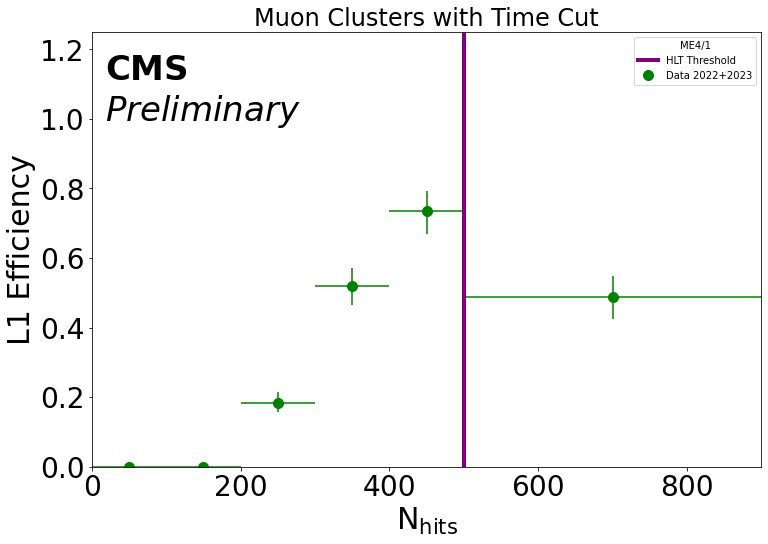

In [14]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
        #fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

Text(0.5, 1.0, 'Muon Clusters with No Time Cut')

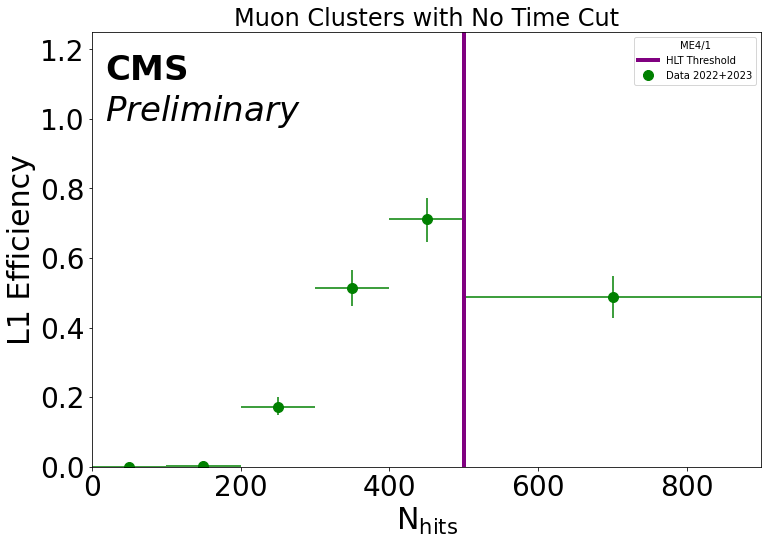

In [15]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

Text(0.5, 1.0, 'Non-Muon Clusters with Time Cut')

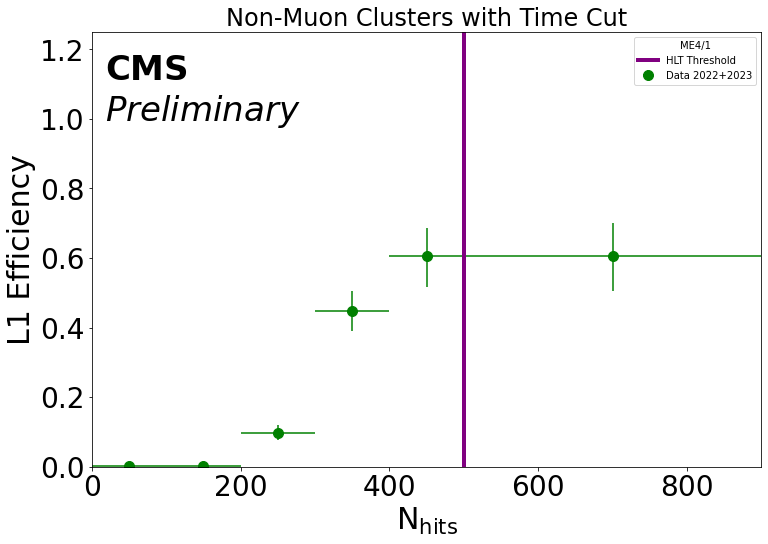

In [16]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

Text(0.5, 1.0, 'Non-Muon Clusters with No Time Cut')

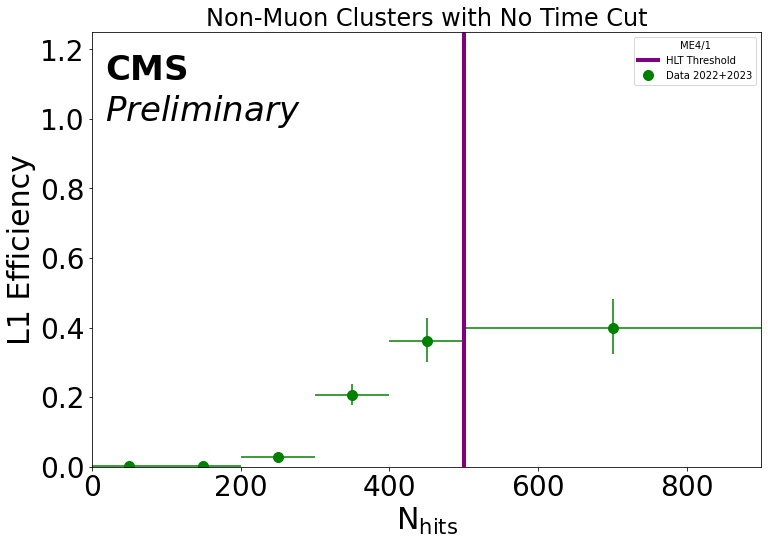

In [17]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME41"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME41
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

In [18]:
bins_ME22 = hist.Bin("cluster_size", "Cluster Size", np.concatenate([np.arange(0, 200, 50), np.arange(200, 1000, 100)]))

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


Text(0.5, 1.0, 'Muon Clusters with Time Cut')

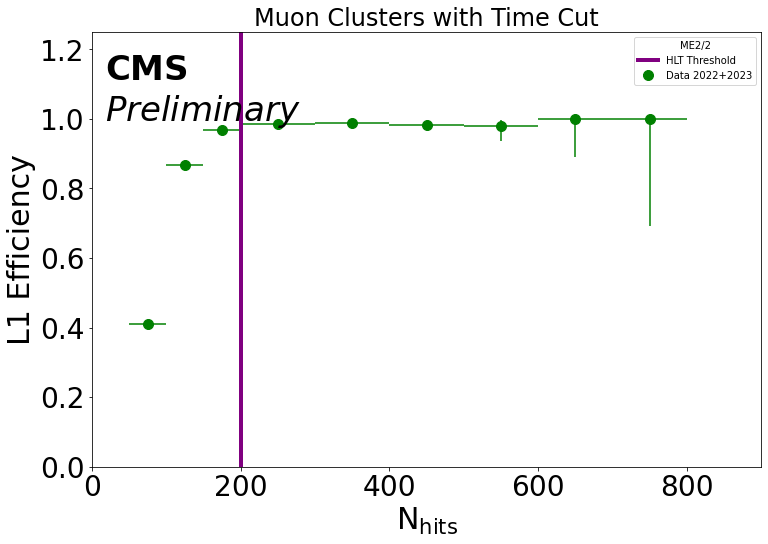

In [19]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


Text(0.5, 1.0, 'Muon Clusters with No Time Cut')

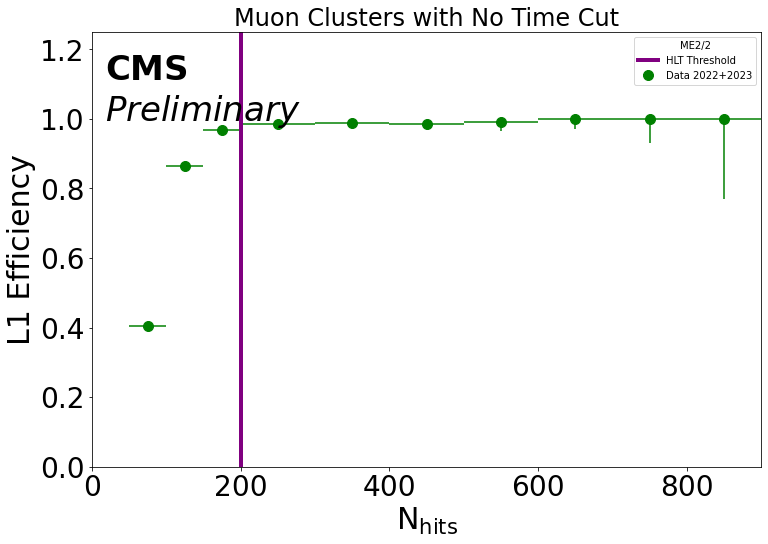

In [20]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_muonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


Text(0.5, 1.0, 'Non-Muon Clusters with Time Cut')

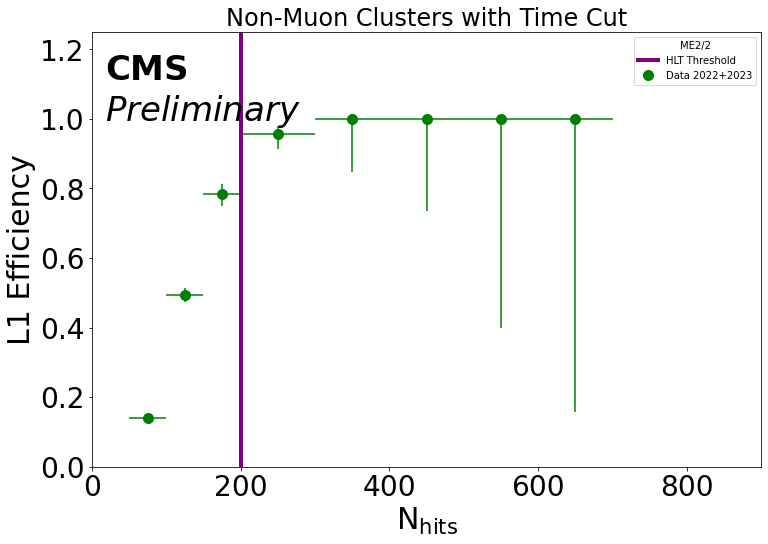

In [21]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_timecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


Text(0.5, 1.0, 'Non-Muon Clusters with No Time Cut')

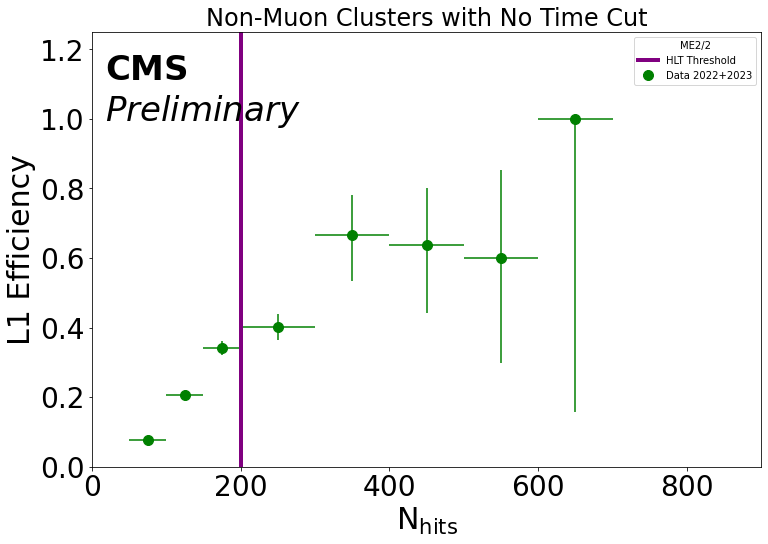

In [22]:
myString = "negEndcap_bothyears_noPhi>3"
plt.figure(figsize=(12,8))
chamber="ME22"
chamber_with_slash = chamber[:3] + '/' + chamber[3]
bins = bins_ME22
for num, sample in enumerate(['all']):
    #if sample=='all':
        #labelName = '2022 + 2023'
    if num==0:
        plt.axvline(chamber_locations[chamber]["HLT_thresh"], color="purple", label="HLT Threshold", linewidth=4)
    
    labelName = sample
    num_hist, denom_hist = get_efficiency_hists(events_all_notMuonMatched_notimecut, chamber, bins)
    
    hist.plotratio(
        ax=plt.gca(),
        num =num_hist.project(bins),
        denom=denom_hist.project(bins),
        error_opts={'marker': '.', 'markersize': 20, 'color':colors[num]},
        unc='clopper-pearson',
        label= "Data 2022+2023",
        clear=False,
        xerr=True
        )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,2]

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title=chamber_with_slash, loc=8)
plt.legend(title=chamber_with_slash)
plt.xlabel("$\mathregular{N_{hits}}$", fontsize=30)
plt.ylabel("L1 Efficiency", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=28)
#hep.cms.label(ax=plt.gca(),data=True, lumi="50.8", fontsize=28, loc=2,COM=13.6)
#plt.gca().text(1.0, 1.07, "23.1 $\mathregular{fb^{-1}}$(2022), 27.7 $\mathregular{fb^{-1}}$(2023). 13.6 TeV", transform=plt.gca().transAxes,
#        fontsize=24, verticalalignment='top', horizontalalignment='right')
plt.gca().text(0.02, 0.95, r"$\bf{CMS}$"+"\n"+r"$\it{Preliminary}$", transform=plt.gca().transAxes,
       fontsize=34, verticalalignment='top', horizontalalignment='left')
plt.xlim(0,900)
plt.ylim(0, 1.25)
plt.title("Non-Muon Clusters with No Time Cut", fontsize=24)
#plt.savefig(f"L1_Efficiency_Plots/{chamber}_{myString}.png")

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


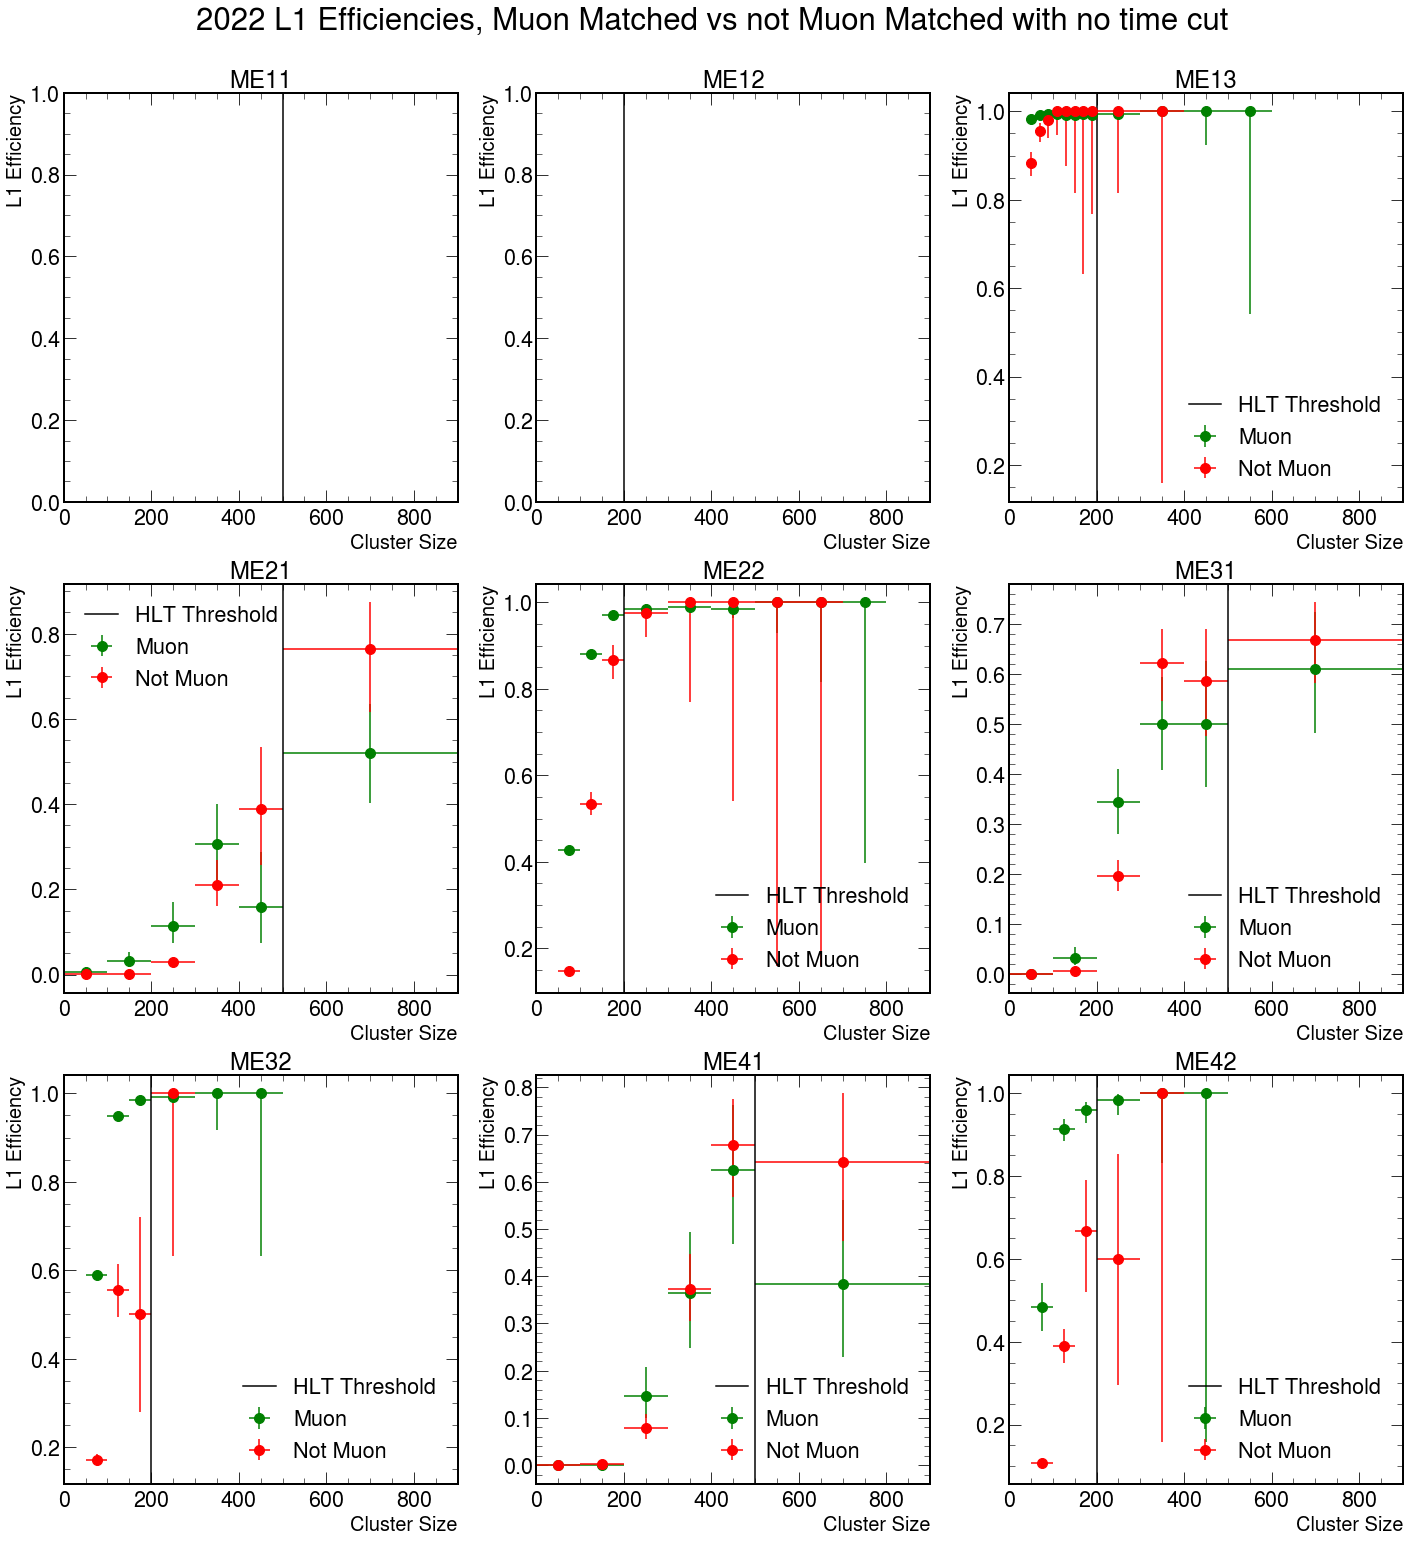

In [23]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2022_muonMatched_timecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2022_notMuonMatched_timecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_muoncut_vs_not.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


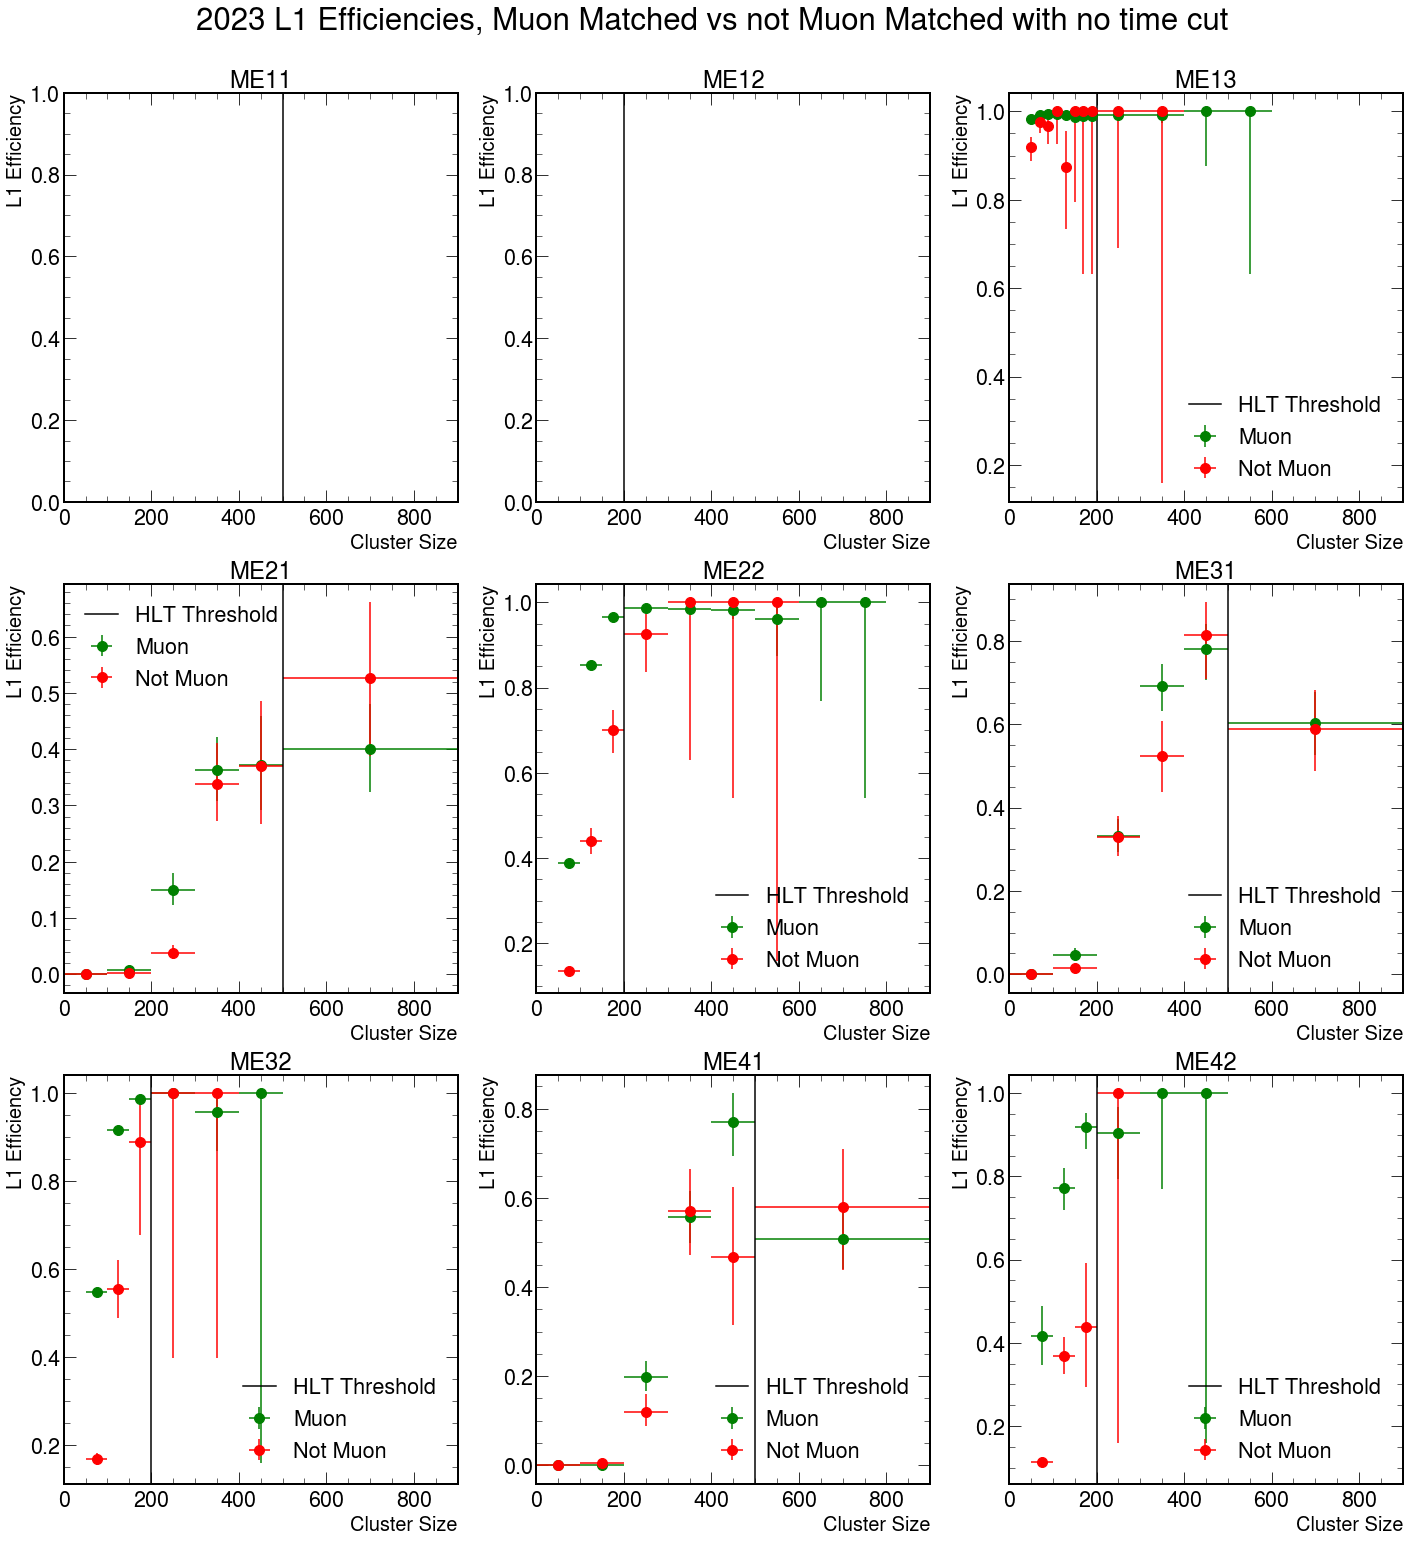

In [24]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2023 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2023_muonMatched_timecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2023_notMuonMatched_timecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2023_muoncut_vs_not.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


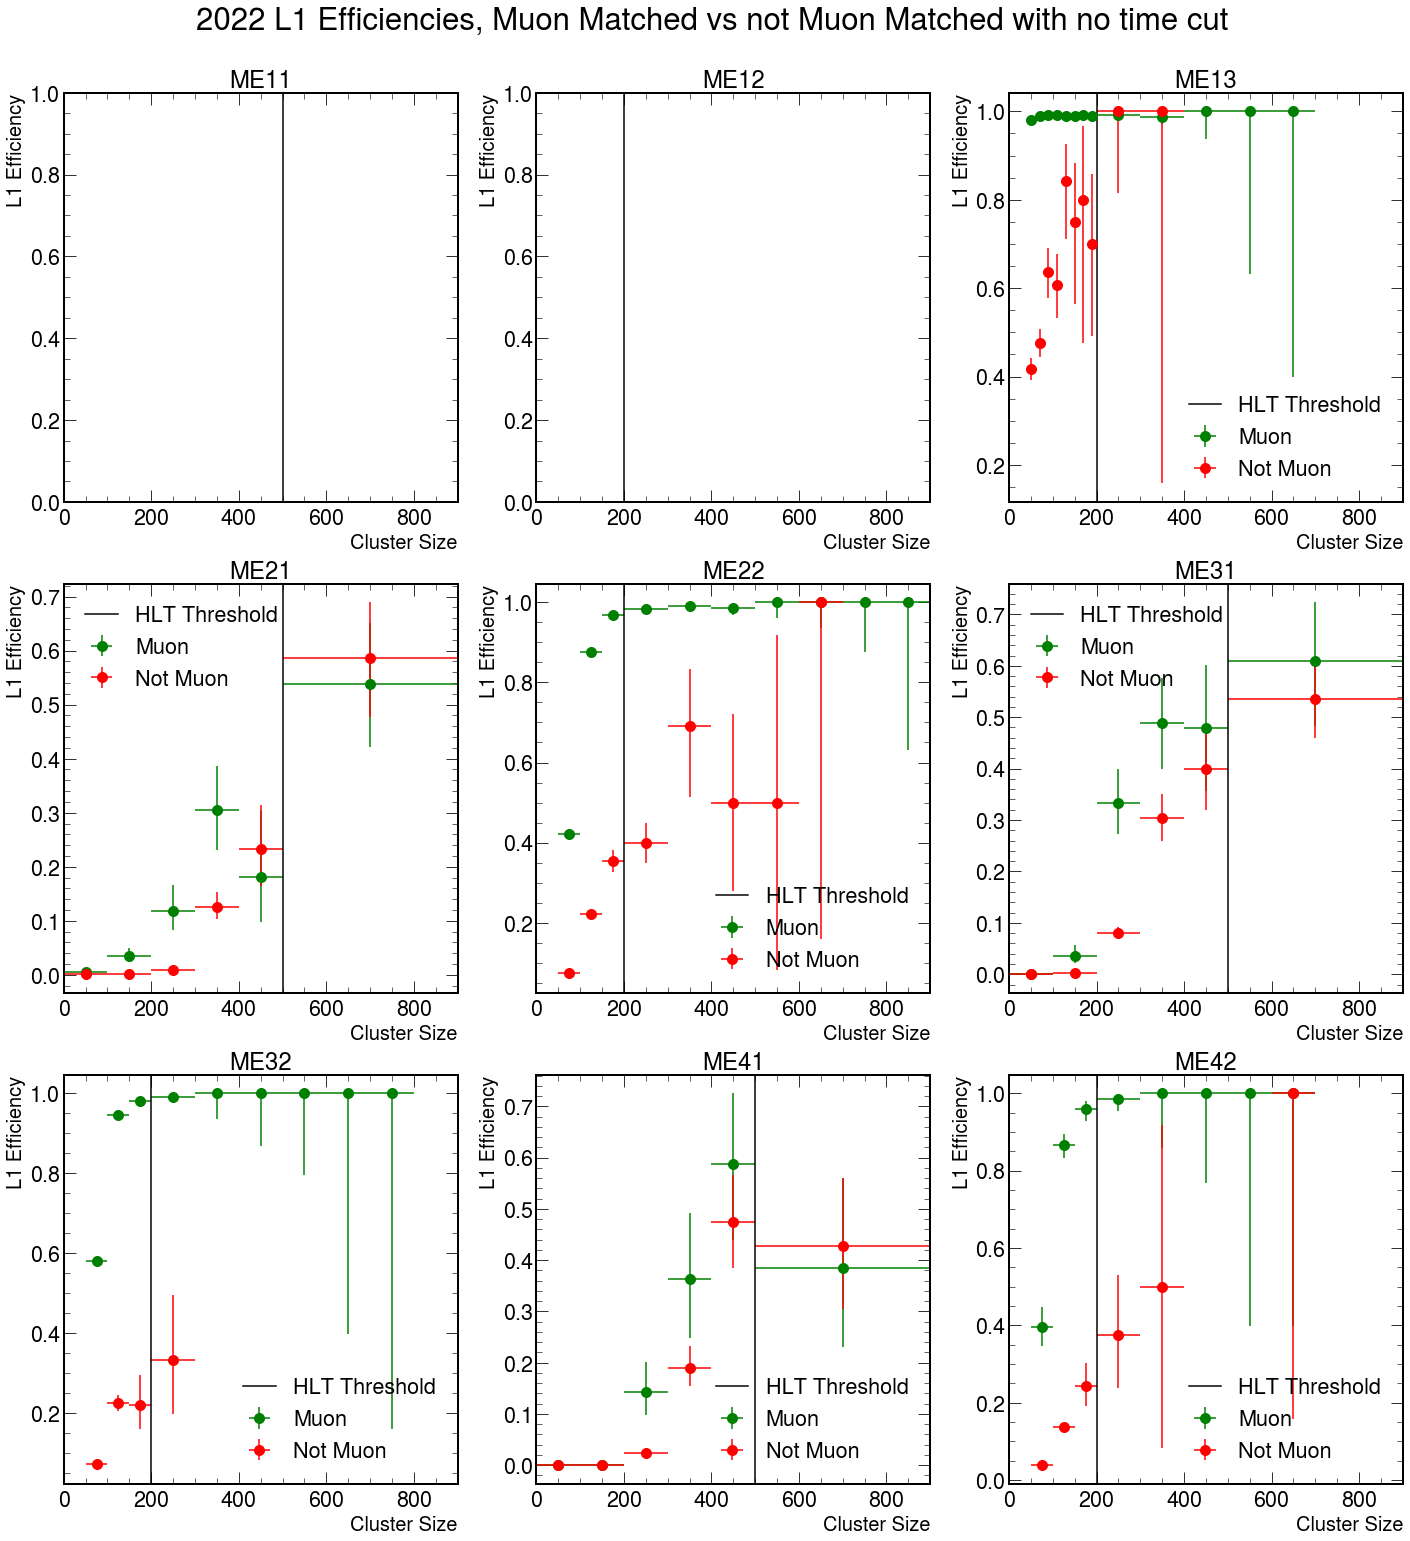

In [25]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2022 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2022_muonMatched_notimecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2022_notMuonMatched_notimecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2022_muoncut_vs_not_notimecut.png")
plt.show()

ME13


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME21
ME22


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME31
ME32


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


ME41
ME42


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


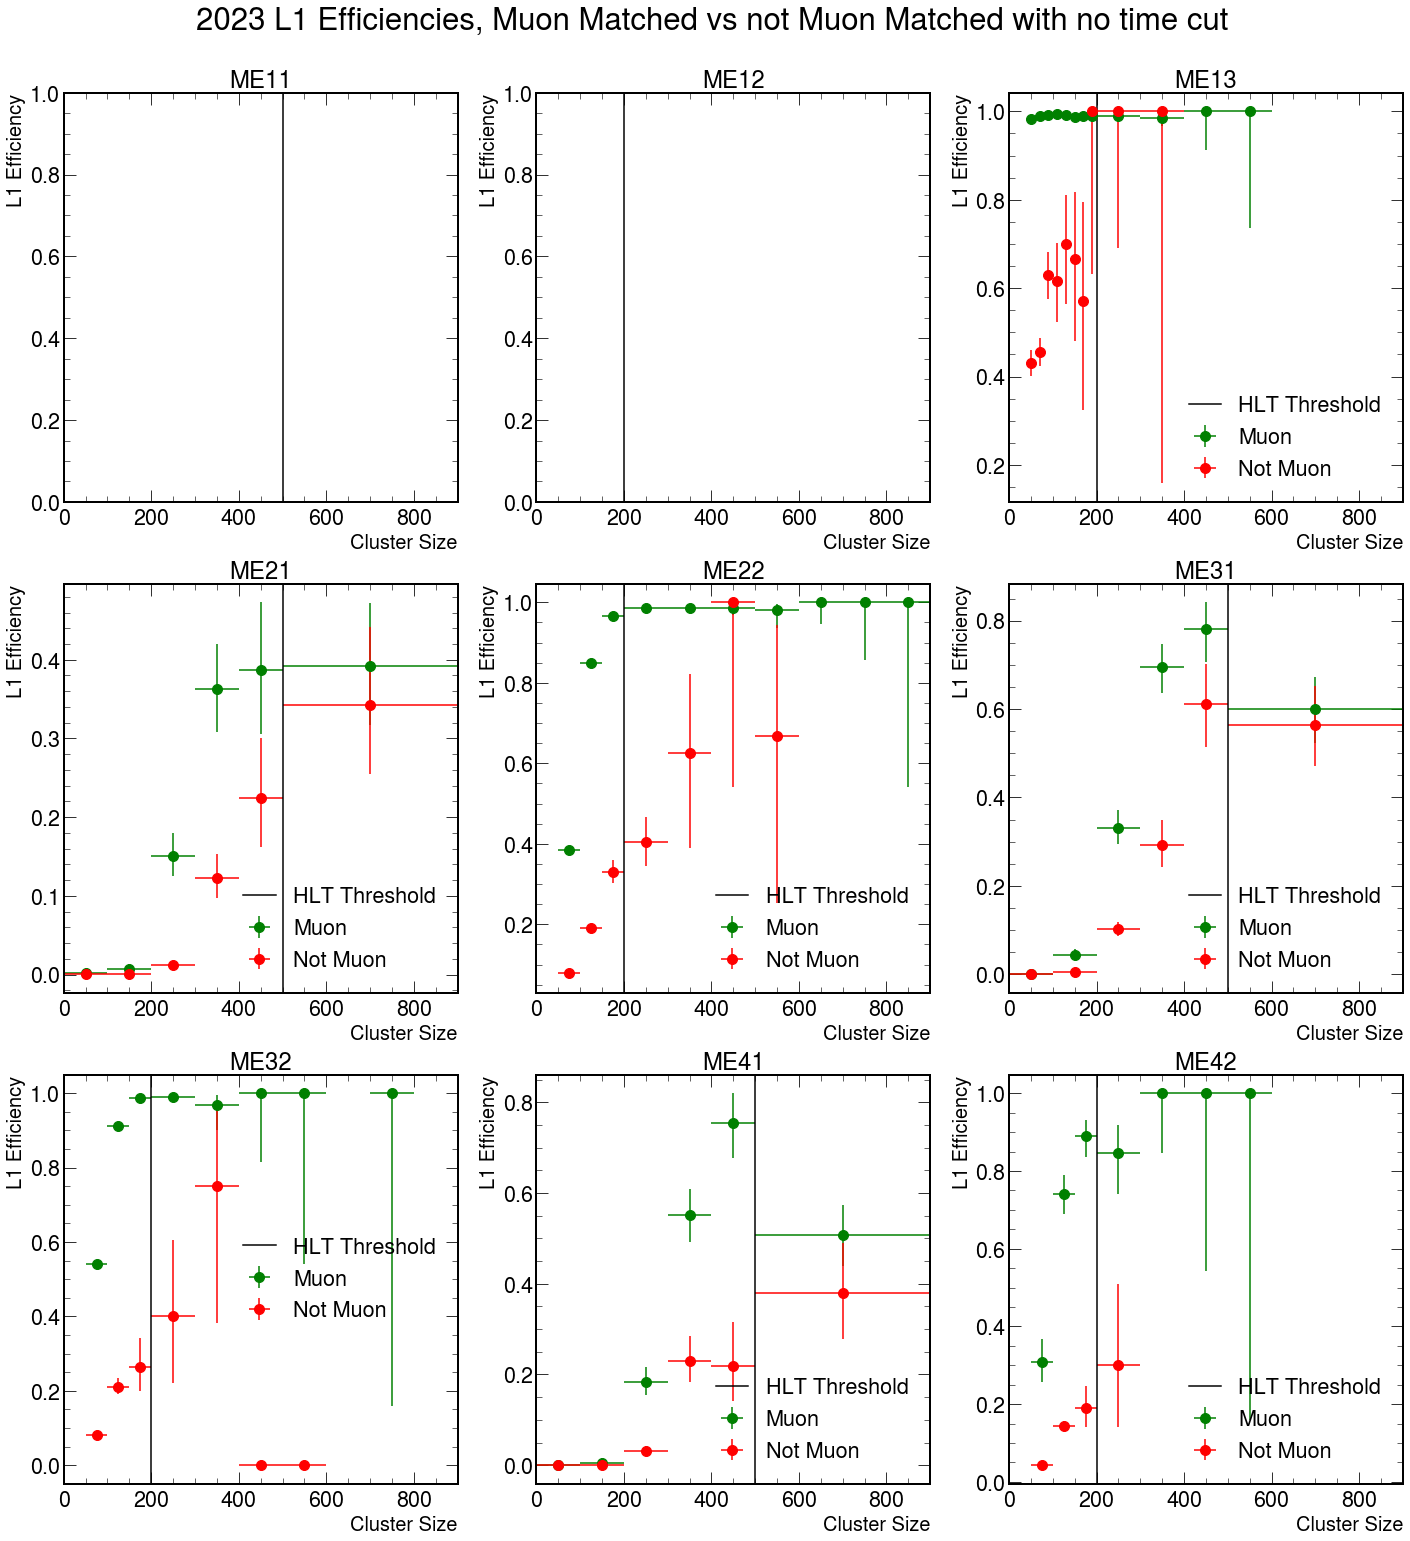

In [26]:
plt.style.use(hep.style.CMS) 
import matplotlib
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
fig.suptitle("2023 L1 Efficiencies, Muon Matched vs not Muon Matched with no time cut")
sample = "all"
#bins = bins_rechits_lowEta_lowNStation10
chambers = ["ME11", "ME12", "ME13", "ME21", "ME22", "ME31", "ME32", "ME41", "ME42"]
counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        
        #chamber = list(chamber_locations.keys())[counter]
        chamber = chambers[counter]
        chamber_int = int(chamber[2:])
        bins = chamber_locations[chamber]["binning"]
        num_hist_muon, denom_hist_muon = get_efficiency_hists(events_2023_muonMatched_notimecut, chamber, bins)
        num_hist_notMuon, denom_hist_notMuon = get_efficiency_hists(events_2023_notMuonMatched_notimecut, chamber, bins)
        counter+=1
        axes[i,j].set_title(chamber, fontsize=24)
        axes[i,j].axvline(chamber_locations[chamber]["HLT_thresh"], color="black", label="HLT Threshold")
        if chamber=="ME11" or chamber=="ME12": 
            axes[i][j].set_xlabel("Cluster Size", fontsize=20)
            axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
            axes[i,j].set_xlim(0,900)
            continue
        '''
        num_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_muon
        num_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_muon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_muon
        denom_hist_muon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        num_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = num_hist_notMuon
        num_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        
        denom_hist_notMuon = hist.Hist("Counts", rechits_axis, bins)
        arr_to_fill = denom_hist_notMuon
        denom_hist_notMuon.fill(sample = f"{ak.count(arr_to_fill)} entries", cluster_size=arr_to_fill)
        '''
        print(chamber)
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_muon.project(bins),
                    denom=denom_hist_muon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[0]},
                    unc='clopper-pearson',
                    label= "Muon",
                    clear=False,
                    xerr=True
                )
        hist.plotratio(
                    ax=axes[i,j],
                    num =num_hist_notMuon.project(bins),
                    denom=denom_hist_notMuon.project(bins),
                    error_opts={'marker': '.', 'markersize': 20, 'color':colors[1]},
                    unc='clopper-pearson',
                    label= "Not Muon",
                    clear=False,
                    xerr=True
                )
        
        axes[i,j].legend()
        #axes[i,j].set_title(chamber, fontsize=24)
        axes[i][j].set_xlabel("Cluster Size", fontsize=20)
        axes[i,j].set_ylabel("L1 Efficiency", fontsize=20)
        axes[i,j].set_xlim(0,900)
        
plt.subplots_adjust(top=0.93)
plt.savefig("L1_Efficiencies_2023_muoncut_vs_not_notimecut.png")
plt.show()